# CC1 Physique Numérique
étudiant: **Rumi Ainara Cambou**

N° étudiant: 21206311

SPRINT - L2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Partie I
1. Pour réprésenter Un/U nous allons utiliser la boucle 'for', ainsi, comme $Un$ dépends des valeurs n-1 et n-2, nous faison la boucle sur $Un+2 = (2-w²) * Un+1 - Un$

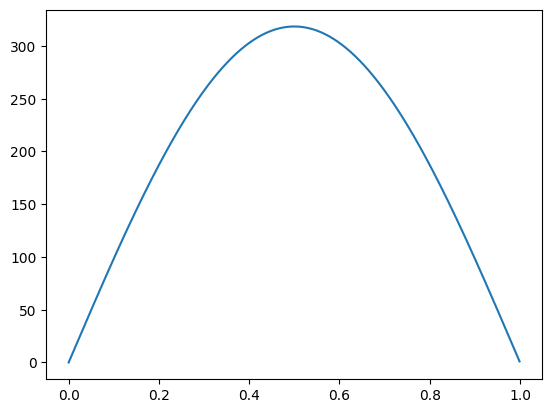

In [2]:
#question 1

#définition de la suite Un
N = 1000 
w = np.pi/N
u = np.empty(N)
u[0] = 0
u[1] = 1 

for n in range(len(u) - 2):
    '''suite un'''
    u[n+2] = (2-w**2)*u[n+1] - u[n]
    
    
#définition de un/U
rapport_Un_U = [] #liste à remplir avec les rapports un/U
for i in range(len(u)):
    '''rapport un/U avec U = uN-1 la dernière valeur de la suite '''
    rap = u[i]/u[N-1] 
    rapport_Un_U.append(rap)
    
    
rapport_nN = []            
for n in range(N):
    '''rapport n/N'''
    rapport_nN.append(n/N)


#plot de la suite en fonction du paramètre n/N
plt.plot(rapport_nN,rapport_Un_U) 

In [3]:
#verification des conditions aux limites
print('uo= ', u[0] , 'u1= ', u[1], 'uN-1= ', u[N-1])

uo=  0.0 u1=  1.0 uN-1=  0.9995887678926363


oui, les conditions aux limites sont respectées.

Text(0, 0.5, 'valeur absolue de A')

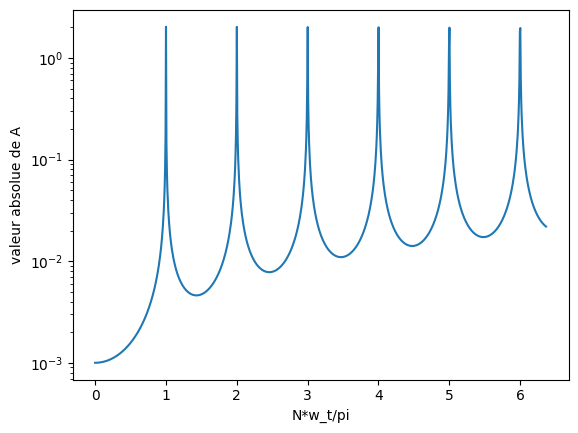

In [46]:
#question 2
#definition de A
N = 1000
n_w = 1000
w_t = np.linspace(0, 20/N , n_w) #nouevelle definition de w qui varie 


def Un(w,N):
    '''returne une suite Un pour un omega et un N donné'''
    Un = np.empty(N)
    Un[0] = 0
    Un[1] = 1
    for n in range(len(Un) - 2):
        '''nouvelle suite Un'''
        Un[n+2] = (2-w**2)*Un[n+1] - Un[n]
    return Un
  

def A(w,u): 
    '''returne la valeur de a pour un omega et une suite donnée'''
    a = 1/abs((2-w**2)*u[N-1] - u[N-2])
    return a

valeurs_A = [] 
for i in range(len(w_t)):
    '''valeur de A associé à chaque omega'''
    val = A(w_t[i] , Un(w_t[i],len(w_t)))
    valeurs_A.append(val)
        
        
paramètre = []
for i in range(len(w_t)):
    paramètre.append(N*w_t[i]/np.pi)

#plot de la fonction
plt.semilogy(paramètre,valeurs_A)
plt.xlabel("N*w_t/pi")
plt.ylabel("valeur absolue de A")

Dans le graphique nous remarquons que l'amplitude se déplace vers le haut lorsque le paramètre N*w/N augmente, donc lorsque omega augmente. 

In [38]:
#question 3

def rapp_Un_U(u):
    '''returne le rapport un/U pour une suite donnée'''
    rapport = []
    for i in range(len(u)):
        rap = u[i]/u[N-1] 
        rapport.append(rap)
    return rapport  

Text(0.5, 0, 'n/N')

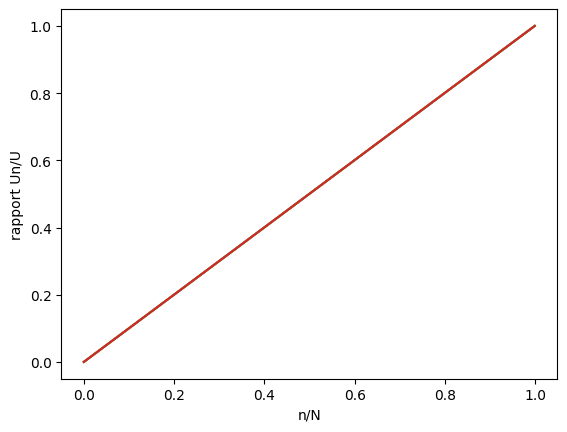

In [47]:
#rapports pour les 4 premiers valeurs de omega 
N3 = len(w_t)
U0 = rapp_Un_U(Un(w_t[0], N3))
U1 = rapp_Un_U(Un(w_t[1], N3))
U2 = rapp_Un_U(Un(w_t[2], N3))
U3 = rapp_Un_U(Un(w_t[3], N3))

paramètre_3 = []
for n in range(N3):
    '''rapport n/N'''
    paramètre_3.append(n/N3)

#plot des rapports
plt.subplot()
plt.plot(paramètre_3, U0)
plt.plot(paramètre_3, U1)
plt.plot(paramètre_3, U2)
plt.plot(paramètre_3, U3)
plt.ylabel('rapport Un/U')
plt.xlabel('n/N')
# plt.ylim(0,2) 

Nous observons que les rapports sont tous égaux, et donc ne dépendent pas du omega choisi. Cela n'est pas surprennant vu que ce rapport est fait entre les valeurs de la suite et la valeur maximal mais tout les deux avec le même omega.
Par ailleurs, nous voyons que le graphique est compris entre 0 et 1 (nous avons verifié cela en regardans le graph sur les "y" plus grands, avec # plt.ylim(0,2) ), les valeurs des elements de la suite peuvent être réprésentés de manière sinusoidale car il sagit d'une fonction bornée entre -1 et 1.


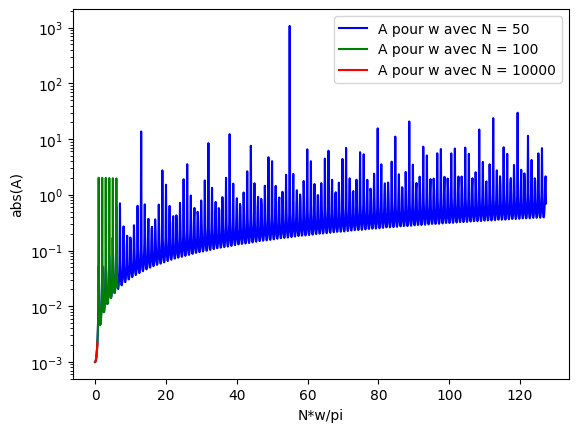

In [75]:
#question 4

#𝑁=50,1000,10000
def w(N):
    w= np.linspace(0, 20/N , n_w)
    return w

w1 = w(50)
w2 = w(1000)
w3 = w(10000)

def valeurs_A(w):
    valeurs_A = [] 
    for i in range(len(w)):
        '''valeur de A associé à chaque omega'''
        val = A(w[i] , Un(w[i],len(w)))
        valeurs_A.append(val)
    return valeurs_A

def paramètre(w):
    paramètre = []
    for i in range(len(w)):
        paramètre.append(N*w[i]/np.pi)
    return paramètre
        
A1 = valeurs_A(w1)
A2 = valeurs_A(w2)
A3 = valeurs_A(w3)

p1 = paramètre(w1)
p2 = paramètre(w2)
p3 = paramètre(w3)


plt.semilogy(p1,A1, '-b')
plt.semilogy(p2,A2,'-g')
plt.semilogy(p3,A3,'-r')
plt.ylabel( 'abs(A)')
plt.xlabel('N*w/pi')
plt.legend(['A pour w avec N = 50', 'A pour w avec N = 100', 'A pour w avec N = 10000'])

Nous n'avons pas reussi à tracer les amplitudes A en fonction de N*w/pi sur un graphique plus clair, cependant, nous remarquons que lorsque N est plus grand l'amplitude se trouve vers des valeurs plus proches de 0. Donc la valeur de réssonance varie avec N.

# Partie II

In [82]:
#question 5
N2 = 1000
n2 = 10000
r1 = 1
r2 = 2
r3 = 3
r4 = 4
r5 = 5

def w2(N, n_w):
    '''nouvel w'''
    w2= np.linspace(0, 4/N , n_w)
    return w2


def Un2(w,r,N):
    '''returne une suite Un pour un omega et un N donné'''
    Un = np.empty(N)
    Un[0] = 0
    Un[1] = 1
    for n in range(len(Un) - 2):
        '''nouvelle suite Un'''
        if n <= N/2:
            Un[n+2] = (2-r*w**2)*Un[n+1] - Un[n]
        else: 
            Un[n+2] = (2-w**2)*Un[n+1] - Un[n]
    return Un

#Rq: la définition A n'a pas changé, donc on utilisera la fonction définie dans la partie 1
def valeurs_A2(w,r):
    valeurs_A2 = [] 
    for i in range(len(w)):
        '''valeur de A associé à chaque omega'''
        val = A(w[i] , Un2(w[i],r,len(w)))
        valeurs_A2.append(val)
    return valeurs_A2

paramètre_2 = paramètre(w2(N2, n2))

In [ ]:
valeurs_A2_r1 = valeurs_A2(w2(N2, n2),r1)
valeurs_A2_r2 = valeurs_A2(w2(N2, n2),r2)
valeurs_A2_r3 = valeurs_A2(w2(N2, n2),r3)
valeurs_A2_r4 = valeurs_A2(w2(N2, n2),r4)
valeurs_A2_r5 = valeurs_A2(w2(N2, n2),r5)

In [ ]:
à manque du temps je n'ai pas pu verifier si ce dernier code est bon, car jupyter met du temps à lire la dernière fenètre.
Or, je laisse le code pour ploter le graph ci-dessous:

In [ ]:
#plot du graphique

plt.subplot()
plt.plot(paramètre_2, valeurs_A2_r1)
plt.plot(paramètre_2, valeurs_A2_r2)
plt.plot(paramètre_2, valeurs_A2_r3)
plt.plot(paramètre_2, valeurs_A2_r4)
plt.plot(paramètre_2, valeurs_A2_r5)
plt.